# Demographic Data Analyzer

### In this challenge you must analyze demographic data using Pandas. You are given a dataset of demographic data that was extracted from the 1994 Census database

In [1]:
# importing libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../FCC Demographic Data Analyzer/adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Inspecting Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.shape

(32561, 15)

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## CHeck for missing values

In [12]:
df.isna().sum() # no missing values. 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [16]:
# Lets check unique values in some variables
df.nunique()
# I dont know "fnlwgt" is. Im gonna drop it. 

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

## Feature Engineering and Questions

* How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (`race` column)
* What is the average age of men?
* What is the percentage of people who have a Bachelor's degree?
* What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
* What percentage of people without advanced education make more than 50K?
* What is the minimum number of hours a person works per week?
* What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
* What country has the highest percentage of people that earn >50K and what is that percentage?
* Identify the most popular occupation for those who earn >50K in India. 

### How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)

In [35]:
Race_represented = df.groupby('race')['race'].value_counts()
Race_represented

race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27816
Name: count, dtype: int64

C:\Users\elian\AppData\Local\Temp\ipykernel_7676\1086425025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Race_represented, palette='Set2')


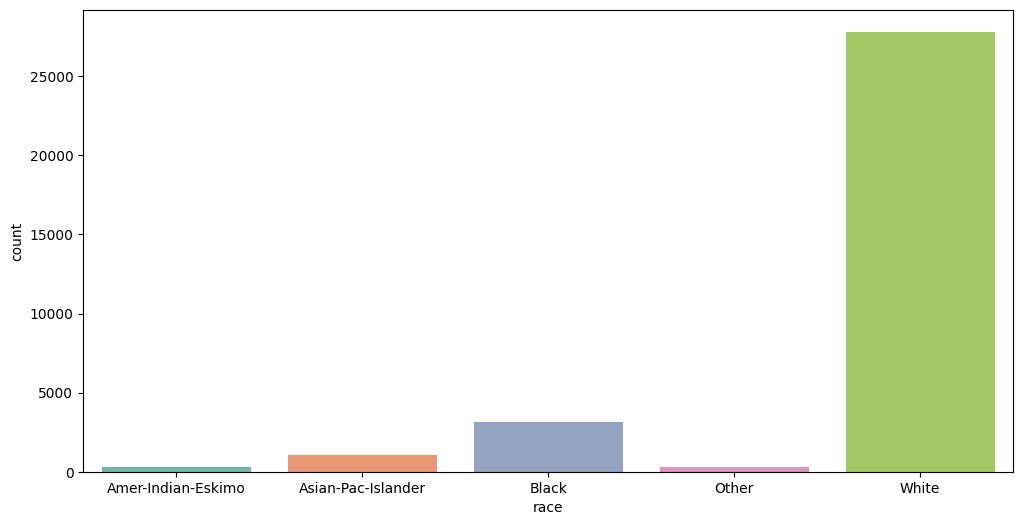

In [43]:
# lets plot a chart for this
plt.figure(figsize=(12,6))
sns.barplot(Race_represented, palette='Set2')
plt.show()

### What is the average age of men?

In [59]:
average_age_men = df.groupby('sex')['age'].mean()
average_age_men.iloc[1] ## Average Age of Men = 39.43354749885268

39.43354749885268

### What is the percentage of people who have a Bachelor's degree?

In [73]:
percentage_bachelors_holders = round((df.loc[df['education'] == 'Bachelors', 'education'].count() / len(df)) * 100, 2)
percentage_bachelors_holders # 16.45 % of people on this dataset are bachelors holders

16.45

### What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [113]:
# Filter the DataFrame for rows where education level is Bachelor's, Master's, or Doctorate
advanced_education_df  = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

# Count the occurrences of individuals making more than 50K
advanced_high_income_count = (advanced_education_df['salary'] == '>50K').sum()
percentage_advanced_education = round((advanced_high_income_count / len(advanced_education_df)) * 100,2)
percentage_advanced_education  # 46.54% of people with advanced education make more than 50k

46.54

### What percentage of people without advanced education make more than 50K?

In [112]:
# Filter the DataFrame for rows where education level is Bachelor's, Master's, or Doctorate
advanced_education_df  = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
advanced_education_df

# Count the occurrences of individuals making more than 50K
advanced_high_income_count = (advanced_education_df['salary'] == '>50K').sum()
percentage_advanced_education = round((advanced_high_income_count / len(advanced_education_df)) * 100,2)
percentage_advanced_education  # 17.37% of people without advanced education make more than 50k

17.37

### What is the minimum number of hours a person works per week?

In [129]:
Minimum_hours_person_week = df['hours-per-week'].min() # 1

### What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [128]:
# filter out people who work minimum hours per week
people_work_minimum_hours = df[df['hours-per-week'] == Minimum_hours_person_week] 

# count occurances of these people making more than 50k
people_minimum_hours_50k = (people_work_minimum_hours['salary'] == '>50K').sum()

final = round((people_minimum_hours_50k / len(people_work_minimum_hours)) * 100, 2)
final # 10.0 of the people who work the minimum number of hours per week have a salary of more than 50K

10.0

### What country has the highest percentage of people that earn >50K and what is that percentage?

In [169]:
#filter out people making >50k
people_making_50Kup = df[df['salary'] == '>50K']

# we gonna exclude '?' that is been represented as a country.
percentagePeople = people_making_50Kup[people_making_50Kup['native-country'] != '?']
# count occurances per country
highest_percentage = ((percentagePeople.groupby('native-country')['native-country'].value_counts().sort_values(ascending=False)) / len(people_making_50Kup)) *100
highest_percentage ## The country with the highest percentage is United-States

native-country
United-States         91.455172
Philippines            0.777962
Germany                0.561153
India                  0.510139
Canada                 0.497386
Mexico                 0.420865
England                0.382604
Italy                  0.318837
Cuba                   0.318837
Japan                  0.306083
Taiwan                 0.255070
China                  0.255070
Iran                   0.229563
South                  0.204056
France                 0.153042
Puerto-Rico            0.153042
Poland                 0.153042
Jamaica                0.127535
El-Salvador            0.114781
Greece                 0.102028
Cambodia               0.089274
Yugoslavia             0.076521
Hong                   0.076521
Ireland                0.063767
Vietnam                0.063767
Ecuador                0.051014
Haiti                  0.051014
Portugal               0.051014
Scotland               0.038260
Thailand               0.038260
Hungary                0.

### Identify the most popular occupation for those who earn >50K in India

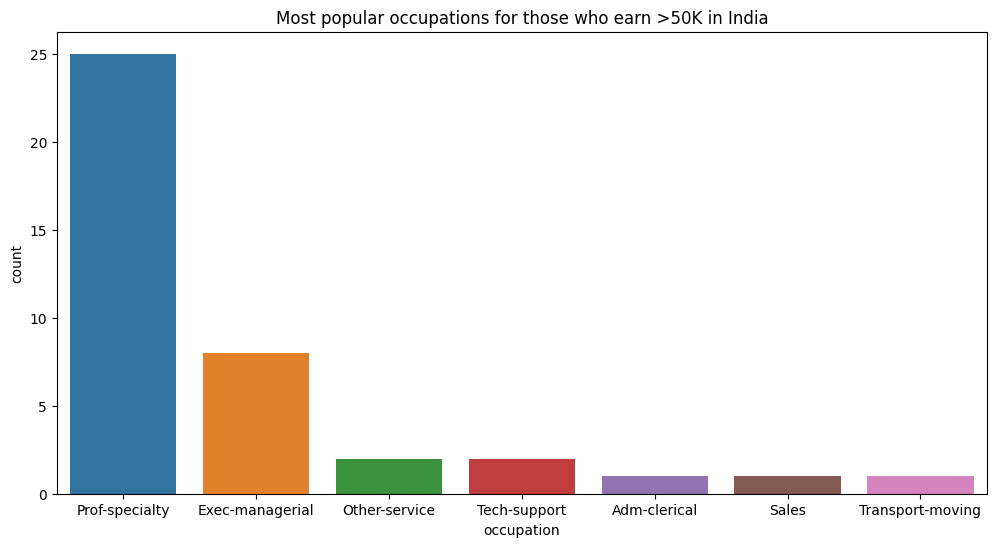

In [202]:
# filter out indians earning >50k
indian_earning_50k = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]
most_popular_occupations = indian_earning_50k.groupby('occupation')['occupation'].value_counts().sort_values(ascending=False)
most_popular_occupations.to_frame()
most_popular_occupations = most_popular_occupations.reset_index()
most_popular_occupations

# lets plot this out
plt.figure(figsize=(12,6))
sns.barplot(most_popular_occupations, x='occupation', y='count', hue='occupation')
plt.title("Most popular occupations for those who earn >50K in India")
plt.show()

In [206]:
# Identify the most popular occupation for those who earn >50K in India in % 
popular_occupations = indian_earning_50k.groupby('occupation')['occupation'].value_counts().sort_values(ascending=False)

(popular_occupations / len(indian_earning_50k) ) * 100

occupation
Prof-specialty      62.5
Exec-managerial     20.0
Other-service        5.0
Tech-support         5.0
Adm-clerical         2.5
Sales                2.5
Transport-moving     2.5
Name: count, dtype: float64